**Berdasarkan dari histogram pada soal dapat dilihat memang benar bahwa gambar yang dilambangkan oleh histogram tersebut memiliki contrast yang buruk (low contrast image) dimana yang berarti gambar tersebut akan lebih sulit untuk dideteksi oleh computer dikarenakan sedikitnya informasi yang dapat diambil karena jumlah perbedaan intensity setiap pixelnya kurang beragam atau tidak kontras warna 1 dengan yang lainnya. Hal ini dapat dilihat bahwa berdasarkan histogram tersebut bahwa gambar didominasi oleh pixel dengan intensitas warna dari +- 110 sampai 200 dengan puncak warna atau intensitas warna terbesar pada angka +- 140.**

**Oleh karena itu untuk dapat membantu computer dalam mendeteksi gambar dengan lebih efektif, dan akurat kita akan melakukan sebuah proses yang dinamakan oleh histogram equalization, dimana inti dari proses tersebut adalah mengambil/menyebarkan range atau jarak intensitas pixel dengan jumlah instensitas tertinggi(bagian yang mengkerucut/puncak pada histogram) untuk disebarkan ke nilai – nilai intensitas lainnya sehingga didapatkan gambar dengan kontras yang tinggi/variasi warna yang banyak (histogram yang lebih seragam) sehingga lebih banyak informasi yang dapat diambil oleh computer. Dan karena berdasarkan soal histogram yang ditunjukkan adalah 1 Dimensi yang berarti gambar berupa grayscale maka sebelum kita mengimplementasikan algoritma diatas kita dapat terlebih dahulu mengkonvert gambar menjadi grayscale.**

In [ ]:
#Import All Necessary Library
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

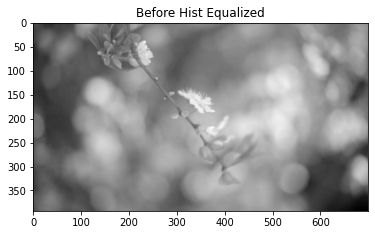

In [ ]:
img_arr = cv2.imread('LowContrastImg.jpg', cv2.IMREAD_GRAYSCALE)
plt.title("Before Hist Equalized")
plt.imshow(img_arr, cmap='gray')

**Pertama kita memasukkan terlebih dahulu gambar yang saya cari dari internet dengan kontras yang rendah (Gambar Terdapat pada file Zip) lalu kita langsung read dalam keadaan grayscale**

In [ ]:
height = img_arr.shape[0]
width = img_arr.shape[1]
intensity_count = np.zeros(256)

for i in range(height):
    for j in range(width):
        intensity_count[img_arr[i][j]] += 1

print(intensity_count)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.500e+01 3.500e+01 5.600e+01 5.100e+01 8.100e+01 4.100e+01 5.200e+01
 4.600e+01 5.800e+01 6.200e+01 5.100e+01 5.900e+01 6.100e+01 5.800e+01
 5.700e+01 7.700e+01 7.300e+01 9.000e+01 6.500e+01 6.000e+01 7.300e+01
 7.500e+01 8.400e+01 1.040e+02 1.250e+02 1.250e+02 8.600e+01 7.300e+01
 8.800e+01 1.230e+02 1.540e+02 1.770e+02 1.340e+02 1.430e+02 1.520e+02
 1.710e+02 1.850e+02 2.670e+02 3.490e+02 6.010e+02 5.520e+02 4.550e+02
 5.080e+02 8.930e+02 1.272e+03 1.096e+03 1.174e+03 1.464e+03 1.249e+03
 9.750e+02 1.454e+03 1.279e+03 9.960e+02 1.094e+03 1.038e+03 9.880e+02
 7.740e+02 8.320e+02 1.066e+03 1.213e+03 1.298e+03 1.153e+03 1.107e+03
 1.004

**Lalu kita menghitung jumlah intensitas dengan loop berdasarkan ukuran gambar dan dapat dilihat bahwa hanya terdapat beberapa intensitas warna saja yang memiliki nilai jumlah pixel sedangkan bagian awal dan akhir angka intensitas tidak memiliki nilai pixel sama sekali (0.0), yang menandakan bahwa gambar memiliki low contrast**

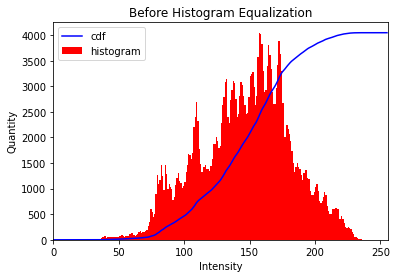

In [ ]:
hist,bins = np.histogram(img_arr.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_arr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.title('Before Histogram Equalization')
plt.show()

**Disini kita langsung melakukan plotting untuk mendapatkan gambaran histogram dari gambar tersebut beserta dengan curva cumulative distribution function(CDF) dan dapat dilihat dari hasilnya bahwa benar hanya bagian tengah saja yang terisi yang menadakan bahwa gambar adalah low contrast image**

In [ ]:
equalized_img_arr = cv2.equalizeHist(img_arr)

**Lalu kita langsung saja melakukan algoritma equalizeHist dari library cv2 yang berfungsi untuk melakukan equalisasi pada histogram agar gambar menjadi lebih kontras**

In [ ]:
e_height = equalized_img_arr.shape[0]
e_width = equalized_img_arr.shape[1]
e_intensity_count = np.zeros(256)

for i in range(e_height):
    for j in range(e_width):
        e_intensity_count[equalized_img_arr[i][j]] += 1

print(e_intensity_count)

[ 548. 1061.  960.  918.  950. 1007. 1401.    0. 1272. 1096. 1174. 1464.
 1249.  975. 1454.    0. 2275.    0. 2132.  988.  774.  832. 1066. 1213.
 1298. 1153. 1107. 1004. 1059. 1123. 1323.    0. 1455. 1673.    0. 1653.
 1588.    0. 1698.    0. 2201.    0. 2394.    0.    0. 2684.    0. 2315.
 1773.    0. 1481. 1335. 1415.    0. 1422. 1468. 1383.    0. 1376. 1340.
 1436.    0. 1575. 1866.    0. 1871.    0. 2000.    0. 1927. 1793.    0.
 1838.    0. 2275.    0.    0. 2628.    0. 2796.    0.    0. 3076.    0.
    0. 3148.    0. 2397.    0. 2289.    0.    0. 2728.    0.    0. 2929.
    0.    0. 3095.    0. 3067.    0.    0. 2752.    0. 2399.    0. 2466.
    0.    0. 2811.    0.    0. 3087.    0.    0. 3027.    0. 2803.    0.
    0. 2628.    0. 2467.    0. 2482.    0.    0. 2790.    0.    0. 3206.
    0.    0. 3241.    0.    0. 3272.    0.    0. 2994.    0. 2640.    0.
    0. 2805.    0.    0. 3582.    0.    0.    0. 4048.    0.    0.    0.
 4015.    0.    0. 3833.    0.    0. 3293.    0.   

**Lalu kita menghitung jumlah intensitas dengan loop berdasarkan ukuran gambar yang sudah kita equalized dan dapat dilihat bahwa terdapat intensitas warna yang memiliki jumlah pixel yang lebih beragam daripada sebelumnya yang menanadakan bahwa gambar sudah lebih kontras**

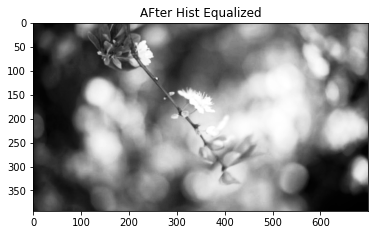

In [ ]:
plt.title("AFter Hist Equalized")
plt.imshow(equalized_img_arr, cmap='gray')

**Lalu kita langsung memploting untuk menunjukkan bagaimana keadaan gambar aslinya dan dapat kita lihat bahwa gambar sudah lebih kontras (bagian gelap lebih hitam dan terang lebih putih)**

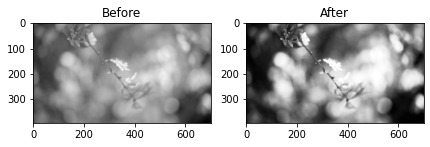

In [ ]:
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.title('Before')
plt.imshow(img_arr, cmap='gray');
plt.subplot(1, 2, 2)
plt.title('After')
plt.imshow(equalized_img_arr, cmap='gray');

**Berikut adalah perbandingan side by side dari before dan after dari algoritma hist equalize**

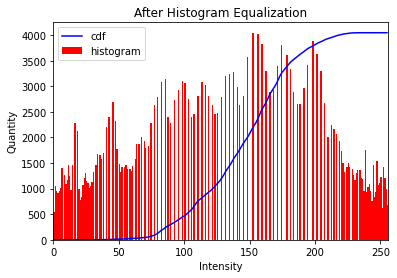

In [ ]:
hist2,bins2 = np.histogram(equalized_img_arr.flatten(),256,[0,256])
cdf2 = hist.cumsum()
cdf_normalized = cdf2 * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized_img_arr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.title('After Histogram Equalization')
plt.show()

**Dan ini adalah hasil histogram dari gambar yang sudah kita equalized dapat dilihat bahwa histogram terlihat lebih general dan hampir semua intensitas warna sudah memiliki pixelnya sendiri dan memungkinkan computer untuk lebih mudah membacanya.**

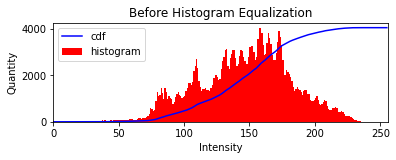

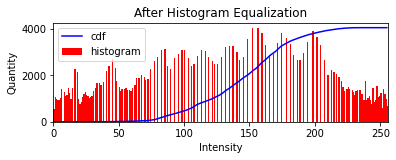

In [ ]:
plt.subplot(2, 1, 1)
hist,bins = np.histogram(img_arr.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_arr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.title('Before Histogram Equalization')
plt.show()

plt.subplot(2, 1, 2)
hist2,bins2 = np.histogram(equalized_img_arr.flatten(),256,[0,256])
cdf2 = hist.cumsum()
cdf_normalized = cdf2 * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized_img_arr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.title('After Histogram Equalization')
plt.show()

**Berikut adalah before dan after grafik histogram untuk gambar diatas**